In [ ]:
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
import sklearn
import sklearn.linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('./predictive_maintenance.csv')

In [ ]:
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [ ]:
for col_name in df.columns:
    print(f'\nColumn: {col_name}')
    print(f' {df[col_name].nunique()} different values')
    print(f' List of values:')
    print(df[col_name].value_counts(dropna=False,normalize=True))


Column: UDI
 10000 different values
 List of values:
UDI
1        0.0001
6671     0.0001
6664     0.0001
6665     0.0001
6666     0.0001
          ...  
3334     0.0001
3335     0.0001
3336     0.0001
3337     0.0001
10000    0.0001
Name: proportion, Length: 10000, dtype: float64

Column: Product ID
 10000 different values
 List of values:
Product ID
M14860    0.0001
L53850    0.0001
L53843    0.0001
L53844    0.0001
L53845    0.0001
           ...  
M18193    0.0001
M18194    0.0001
L50515    0.0001
L50516    0.0001
M24859    0.0001
Name: proportion, Length: 10000, dtype: float64

Column: Type
 3 different values
 List of values:
Type
L    0.6000
M    0.2997
H    0.1003
Name: proportion, dtype: float64

Column: Air temperature [K]
 93 different values
 List of values:
Air temperature [K]
300.7    0.0279
298.9    0.0231
297.4    0.0230
300.5    0.0229
298.8    0.0227
          ...  
304.4    0.0007
296.0    0.0006
295.4    0.0003
295.3    0.0003
304.5    0.0001
Name: proportion, Lengt

In [ ]:
df['Type'] = df['Type'].replace({'M':2,'L':1,'H':0}).astype(int)
df['Failure Type'] = df['Failure Type'].replace({'No Failure':6, 'Power Failure':5, 'Tool Wear Failure':4,
       'Overstrain Failure':3, 'Random Failures':2,
       'Heat Dissipation Failure':1}).astype(int)


In [ ]:
df.isnull==False

False

In [ ]:
df=df.drop(['UDI', 'Product ID'], axis=1)

In [ ]:
df = pd.concat([df.iloc[:,:-1], pd.get_dummies(df['Failure Type'], dtype=int)], axis=1)

In [ ]:
df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,1,2,3,4,5,6
0,2,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,1
1,1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,1
2,1,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,1
3,1,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,1
4,1,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,298.8,308.4,1604,29.5,14,0,0,0,0,0,0,1
9996,0,298.9,308.4,1632,31.8,17,0,0,0,0,0,0,1
9997,2,299.0,308.6,1645,33.4,22,0,0,0,0,0,0,1
9998,0,299.0,308.7,1408,48.5,25,0,0,0,0,0,0,1


In [ ]:
df= df.rename(str,axis="columns")

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

In [ ]:
df_mean = df_scaled.mean()
df_cov = df_scaled.cov()

In [ ]:
def mahalanobis_distance(x, mean, cov):
    x_minus_mean = x - mean
    inv_cov = np.linalg.inv(cov)
    left_term = np.dot(x_minus_mean, inv_cov)
    mahal = np.dot(left_term, x_minus_mean.T)
    return mahal.diagonal()

df_scaled['mahalanobis'] = mahalanobis_distance(df_scaled.values, df_mean.values, df_cov.values)

In [ ]:
from scipy.stats import chi2
alpha = 0.05  # Nilai alpha untuk menentukan ambang batas outlier
df_scaled['chi_squared'] = chi2.ppf(1 - alpha, df_scaled.shape[1]-1)  # Hitung nilai kritis Chi-squared

In [ ]:
outlier_indices = df_scaled[df_scaled['mahalanobis'] > df_scaled['chi_squared']].index

df_no_outliers = df_scaled.drop(outlier_indices)

In [ ]:
df_bersih = df_no_outliers.drop(['mahalanobis','chi_squared'],axis=1)

In [ ]:
df_bersih.shape

(9570, 13)

In [ ]:
X = df_bersih.drop(['1','2','3','4','5','6'], axis=1)
y = df_bersih[['1','2','3','4','5','6']]

In [ ]:
#X=np.array(X)
#y=np.array(y)

In [ ]:
X_val, X_test, y_val, y_test = train_test_split(X, y, test_size=0.15,
                                                    random_state=42)
X_temp, X_train, y_temp, y_train = train_test_split(X_val, y_val, test_size=0.823529412,
                                                random_state=42)

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
def softmax(Z):
    A = np.exp(Z) / np.sum(np.exp(Z),axis=0)
    cache = Z
    return A,cache

def sigmoid(Z):

    A = 1/(1+np.exp(-Z))
    cache = Z

    return A, cache

def relu(Z):

    A = np.maximum(0,Z)

    assert(A.shape == Z.shape)

    cache = Z
    return A, cache

def relu_backward(dA, cache):

    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.

    # When z <= 0, you should set dz to 0 as well.
    dZ[Z <= 0] = 0

    assert (dZ.shape == Z.shape)

    return dZ

def sigmoid_backward(dA, cache):
    Z = cache

    s = 1/(1+np.exp(-Z))

    dZ = dA * s * (1-s)# bagian ini diganti dengan jacobian matrix

    assert (dZ.shape == Z.shape)

    return dZ

# def softmax_backward(dA,cache):
#     s = cache[1] # cache linear activation
#     I = np.eye(7,7)
#     return dA * softmax(s)[0] * (I - softmax(s)[0].T)

In [ ]:
# GRADED FUNCTION: initialize_parameters

def initialize_parameters_deep(layer_dims):

    np.random.seed(1)
    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * 0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))

        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))


    return parameters

# forward
def linear_forward(A, W, b):

    Z = W.dot(A) + b

    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)

    return Z, cache

def linear_activation_forward(A_prev, W, b, activation):

    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)

    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)

    elif activation == "softmax":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = softmax(Z)

    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

def L_model_forward(X, parameters):

    caches = []
    A = X
    L = len(parameters) // 2        # number of layers in the neural network

    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A.copy()
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation = "relu")
        caches.append(cache)

    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], activation = "softmax")
    caches.append(cache)

    assert(AL.shape == (6,X.shape[1]))

    return AL, caches

# Compute cost
def compute_cost(AL, Y):

    m = Y.shape[1]

    # Compute loss from aL and y.
    # cost = (1./m) * np.sum(-np.dot(Y,np.log(AL).T) - np.dot(1-Y, np.log(1-AL).T))
    m = Y.shape[1]
    cost = -np.sum(Y * np.log(AL)) / m
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())

    return cost

# Backward
def linear_backward(dZ, cache):

    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = 1./m * np.dot(dZ,A_prev.T)
    db = 1./m * np.sum(dZ, axis = 1, keepdims = True)
    dA_prev = np.dot(W.T,dZ)

    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)

    return dA_prev, dW, db

def linear_activation_backward(dA, cache, activation):

    linear_cache, activation_cache = cache

    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)

    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)

    elif activation == "softmax":
        dZ = dA
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    return dA_prev, dW, db

def L_model_backward(AL, Y, caches):

    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL

    # Initializing the backpropagation
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))

    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "AL, Y, caches". Outputs: "grads["dAL"], grads["dWL"], grads["dbL"]
    current_cache = caches[L-1]
    grads["dA" + str(L)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(AL-Y, current_cache, activation="softmax")
#     ZA = linear_forward(caches[L][0][0],caches[L][0][1],caches[L][0][2])[0].copy()
#     grads["dA" + str(L)]   = AL-Y
#     grads["dW" + str(L)]   = 1./m * np.dot(AL-Y,ZA.T)
#     grads["db" + str(L)]   = 1./m * np.sum(AL-Y, axis = 1, keepdims = True)
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 2)], current_cache, activation = "relu")
        grads["dA" + str(l + 1)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

# Update Parameter
def update_parameters(parameters, grads, learning_rate):

    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]

    return parameters

# prediksi khusus untuk class yang lebih dari 2
def predict_softmax(X, Y, parameters):

    # Computes probabilities using forward propagation, and classifies with softmax
    #exp = np.exp(forward_propagation(X, parameters)[0])
    #softmax = exp/np.sum(exp,axis=0)
    softmax = L_model_forward(X, parameters)[0]
    prediksi = np.max(softmax,axis=0) == softmax
    prediksi = prediksi.T.copy()

    asli_train = Y.T.copy()
    prediksi = sum(np.sum(prediksi == asli_train, axis=1)==Y.shape[0])/Y.T.shape[0] * 100
    return prediksi

# Melatih model
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):

    np.random.seed(1)
    costs = []                         # keep track of cost

    # Parameters initialization.
    parameters = initialize_parameters_deep(layers_dims)

    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.

        AL, caches = L_model_forward(X, parameters)

        # Compute cost.
        cost = compute_cost(AL, Y)

        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)

        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)

        # Print the cost every 100 iterations
        if print_cost and i % 100 == 0 or i == num_iterations - 1:
            print("\niter:{} \t cost: {} \t train_accuracy:{} ".format(i, np.round(cost, 4), predict_softmax(X, Y, parameters)) )
            print("=========================================================", end = '')
        if i % 100 == 0 or i == num_iterations:
            costs.append(cost)

    return parameters, costs

# Prediksi
def predict(X, y, parameters):

    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((1,m))

    # Forward propagation
    probas, caches = L_model_forward(X, parameters)


    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0

    #print results
    #print ("predictions: " + str(p))
    #print ("true labels: " + str(y))
    print("Accuracy: "  + str(np.sum((p == y)/m)))

    return p


In [ ]:
y_train

,1,2,3,4,5,6
5830,0.0,0.0,0.0,0.0,0.0,1.0
8420,0.0,0.0,0.0,0.0,0.0,1.0
1007,0.0,0.0,0.0,0.0,0.0,1.0
232,0.0,0.0,0.0,0.0,0.0,1.0
4834,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
6008,0.0,0.0,0.0,0.0,0.0,1.0
2423,0.0,0.0,0.0,0.0,0.0,1.0
3662,0.0,0.0,0.0,0.0,0.0,1.0
7747,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
X = X_train.T.copy()
Y = np.array(y_train).T.copy()
layers_dims = [X.shape[0], 40,28, Y.shape[0]]

In [ ]:
parameters, costs = L_layer_model(X, Y, layers_dims, num_iterations = 2800, print_cost = True, learning_rate = 0.02)


iter:0 	 cost: 1.7918 	 train_accuracy:100.0 
iter:100 	 cost: 0.6927 	 train_accuracy:100.0 
iter:200 	 cost: 0.334 	 train_accuracy:100.0 
iter:300 	 cost: 0.2015 	 train_accuracy:100.0 
iter:400 	 cost: 0.138 	 train_accuracy:100.0 
iter:500 	 cost: 0.1017 	 train_accuracy:100.0 
iter:600 	 cost: 0.0785 	 train_accuracy:100.0 
iter:700 	 cost: 0.0626 	 train_accuracy:100.0 
iter:800 	 cost: 0.0511 	 train_accuracy:100.0 
iter:900 	 cost: 0.0424 	 train_accuracy:100.0 
iter:1000 	 cost: 0.0358 	 train_accuracy:100.0 
iter:1100 	 cost: 0.0306 	 train_accuracy:100.0 
iter:1200 	 cost: 0.0265 	 train_accuracy:100.0 
iter:1300 	 cost: 0.0231 	 train_accuracy:100.0 
iter:1400 	 cost: 0.0203 	 train_accuracy:100.0 
iter:1500 	 cost: 0.018 	 train_accuracy:100.0 
iter:1600 	 cost: 0.0161 	 train_accuracy:100.0 
iter:1700 	 cost: 0.0145 	 train_accuracy:100.0 
iter:1800 	 cost: 0.0131 	 train_accuracy:100.0 
iter:1900 	 cost: 0.0119 	 train_accuracy:100.0 
iter:2000 	 cost: 0.0109 	 train_a

In [ ]:
def plot_costs(costs, learning_rate=0.0075):
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

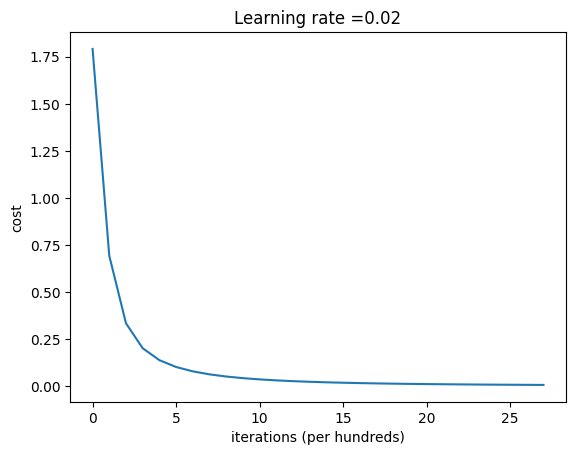

In [ ]:
plot_costs(costs, learning_rate=0.02)

In [ ]:
def predict_label_2(parameters, X):


    softmax = L_model_forward(X, parameters)[0]
    prediksi = np.max(softmax,axis=0) == softmax
    return prediksi.T

def reverse(df):
    df['Class'] = 0
    for c in df.columns:
        df['Class'] = np.where(df[c]==1,c,df['Class'])
    return df[['Class']]

X1 = X_val.T.copy()
output_asli = reverse(y_val.reset_index(drop = True))

                                                                #columns sesuai jumlah class di masalah data
output_prediksi = reverse(pd.DataFrame(predict_label_2(parameters,X1),columns=[1,2,3,4,5,6]).astype(int))

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
score=precision_score(output_asli, output_prediksi, average='weighted')
clf=predict_label_2(parameters,X1)
k_folds = KFold(n_splits = 5)
scores = cross_val_score(clf, X1, y_val, cv = k_folds,scoring=score)
print("Cross Validation Scores MSE: ", scores)
print("Average CV Score MSE: ", scores.mean())

TypeError: estimator should be an estimator implementing 'fit' method, array([[False, False, False, False, False,  True],
       [False, False, False, False, False,  True],
       [False, False, False, False, False,  True],
       ...,
       [False, False, False, False, False,  True],
       [False, False, False, False, False,  True],
       [False, False, False, False, False,  True]]) was passed

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(output_asli, output_prediksi, average='weighted')
recall = recall_score(output_asli, output_prediksi, average='weighted')
f1 = f1_score(output_asli, output_prediksi, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [ ]:
output_asli

In [ ]:
#output_prediksi=np.array(output_prediksi)
#output_asli=np.array(output_asli)
#data=np.array([output_prediksi,output_asli]).T
data=[output_prediksi,output_asli]
pred = pd.concat(data,axis=1,join="inner")
pred